In [1]:
import numpy as np
import complot
import matplotlib.pyplot as plt
import uproot3 as uproot
import ipanema
import math

In [2]:
data = uproot.open("/scratch08/marcos.romero/tuples/data/BsJpsiPhi_Data_2016_UpDown_20190123_tmva_cut58_sel_comb_sw_corrLb.root")["DecayTree"].pandas.df(flatten=None)
data

,B_MINIP,B_MINIPCHI2,B_MINIPNEXTBEST,B_MINIPCHI2NEXTBEST,B_ENDVERTEX_X,B_ENDVERTEX_Y,B_ENDVERTEX_Z,B_ENDVERTEX_XERR,B_ENDVERTEX_YERR,B_ENDVERTEX_ZERR,...,alpha,year,hlt1b,bdtg3,tagos_dec_new,tagos_eta_new,tagos_dec_old,tagos_eta_old,wLb,sw
entry,,,,,,,,,,,,,,,,,,,,,
0,0.016236,2.012817,0.828389,975.957901,0.981500,0.162400,-13.498300,0.013600,0.022200,0.553800,...,1.0,2016,0,0.998623,1,0.451892,1,0.436651,1.000000,1.045015
1,0.036532,5.500612,-1.000000,-1.000000,-0.170400,-2.412200,-3.988800,0.009800,0.014600,0.111400,...,1.0,2016,1,0.999776,0,0.500000,0,0.500000,1.000000,0.991784
2,0.020466,1.132523,0.299336,651.647196,0.702100,-0.051300,11.675900,0.019200,0.017200,0.158700,...,1.0,2016,0,0.954597,0,0.500000,0,0.500000,1.000000,-0.123426
3,0.014777,1.368142,-1.000000,-1.000000,0.755900,-0.361500,39.850400,0.017200,0.023200,0.155200,...,1.0,2016,0,0.975013,-1,0.481580,-1,0.432099,1.000000,1.028856
4,0.028258,2.886764,-1.000000,-1.000000,0.900300,-0.206800,-6.239100,0.013400,0.014000,0.063400,...,1.0,2016,0,0.902690,0,0.500000,0,0.500000,1.000000,-0.114374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183564,0.031370,3.936502,-1.000000,-1.000000,-1.088189,0.280675,79.890133,0.033157,0.016308,0.337838,...,1.0,2016,0,0.817710,0,0.500000,-1,0.417817,-0.000761,0.000085
183565,0.019650,2.726786,0.743249,791.180869,2.125965,-0.341084,-10.301956,0.013669,0.006350,0.126680,...,1.0,2016,0,0.975061,0,0.500000,1,0.343628,-0.011726,0.001286
183566,0.005544,0.064815,1.899927,4599.356125,1.212115,-0.294286,65.903904,0.015796,0.018064,0.323366,...,1.0,2016,0,0.937167,1,0.411773,0,0.500000,-0.180988,0.020002


In [47]:
df = data #.query("X_M<1008")
df.eval("tagOSdec = tagos_dec_new", inplace=True)
df.eval("tagOSeta = tagos_eta_new", inplace=True)
df.eval("tagSSdec = B_SSKaonLatest_TAGDEC", inplace=True)
df.eval("tagSSeta = B_SSKaonLatest_TAGETA", inplace=True)
df['time'].iat[0]

0.62560209099247

In [48]:
1+1

2

In [49]:
pars = ipanema.Parameters.load("output/params/physics_params/run2/Bs2JpsiPhi/v2r0bdt2@LcosK_auto_run2Dual_vgc_amsrd_simul3_amsrd_combined.json").valuesdict()
pars['p0_os']  = 0.389
pars['p1_os']  = 0.8486
pars['p0_ss']  = 0.4325
pars['p1_ss']  = 0.9241
pars['dp0_os'] = 0.009
pars['dp1_os'] = 0.0143
pars['dp0_ss'] = 0
pars['dp1_ss'] = 0

print(pars)
timeres = {"sigma_offset":  1.29700e-02, "sigma_slope": 8.44600e-01, "sigma_curvature":0}
print(timeres)

OrderedDict([('fSlon1', 0.4557026856843885), ('fSlon2', 0.03992445596517333), ('fSlon3', 0.0028841625055527234), ('fSlon4', 0.003178289933429951), ('fSlon5', 0.04925877288129037), ('fSlon6', 0.15070597110099176), ('fPlon', 0.5213980571389263), ('fPper', 0.24279611437776336), ('pSlon', 0), ('pPlon', 0.29473042081173073), ('pPpar', 0), ('pPper', 0), ('dSlon1', 1.9800316695205944), ('dSlon2', 1.6457885381928692), ('dSlon3', 1.0810140442135805), ('dSlon4', -0.17457238672137088), ('dSlon5', -0.6135157083821028), ('dSlon6', -0.9751715260740577), ('dPlon', 0), ('dPpar', 3.1431377812019443), ('dPper', 2.7855941004785088), ('lSlon', 1), ('lPlon', 1.0046965769670613), ('lPpar', 1), ('lPper', 1), ('Gd', 0.65789), ('DGs', 0.27998974321696757), ('DGsd', 0.011258329852771046), ('DM', 17.737823516644806), ('eta_os', 0.3602), ('eta_ss', 0.4167), ('p0_os', 0.389), ('p1_os', 0.8486), ('p0_ss', 0.4325), ('p1_ss', 0.9241), ('dp0_os', 0.009), ('dp1_os', 0.0143), ('dp0_ss', 0), ('dp1_ss', 0)])
{'sigma_offse

In [50]:
def get_omega(eta, tag, p0, p1, p2, dp0, dp1, dp2, eta_bar):
  result = 0;
  result += (p0 + tag*0.5*dp0);
  result += (p1 + tag*0.5*dp1)*(eta - eta_bar);
  result += (p2 + tag*0.5*dp2)*(eta - eta_bar)*(eta - eta_bar);

  if result < 0.0:
      return 0
  return result
  
  
def get_omega_simon(eta, tag, p0, p1, p2, dp0, dp1, dp2, eta_bar):
     meas_omega = 0.5*(1.0-eta)
     ma = 0.99;
     mi = 0;
     omega = 0
     omega += (p0 + 0.5*tag*dp0)
     omega += (p1 + 0.5*tag*dp1) * (meas_omega - eta_bar)
     omega += (p2 + 0.5*tag*dp2) * (meas_omega - eta_bar)**2
     if (1. + eta * (1-2*omega)) == 0:
         return 0.5
     return omega

In [51]:
weight_string = "sw"
tagging = "data"
asymmetry_plot_plus = []
asymmetry_plot_minus = []
tLL = 0.0
tUL = 2*np.pi / 17.757
num_bins = 8
lh_scale = 10



for i in range(int(1e3)):
    # weight
    wP = df[weight_string].iat[i]
    wM = df[weight_string].iat[i]

    # print(wP)
    tagOS = 0
    tagSS = 0
    dilutionOS = 0.0
    dilutionOSB = 0.0
    dilutionOSBbar = 0.0;
    dilutionSS = 0.0
    dilutionSSB = 0.0
    dilutionSSBbar = 0.0;

    if tagging == "perfect":
        tagSS = df['tagOSdec'].iat[i]
        tagOS = df['tagSSdec'].iat[i]
        dilutionOSB = 1
        dilutionSSB = 1
        dilutionOSBbar = 1
        dilutionSSBbar = 1
    else:
        tagOS = df['tagOSdec'].values[i]
        tagSS = df['tagSSdec'].values[i]
        omegaOSB = get_omega(df['tagOSeta'].iat[i], +1,    pars['p0_os'], pars['p1_os'], 0*pars['p1_os'], pars['dp0_os'], pars['dp1_os'], 0*pars['dp1_os'], pars['eta_os'])
        omegaOSBbar = get_omega(df['tagOSeta'].iat[i], -1, pars['p0_os'], pars['p1_os'], 0*pars['p1_os'], pars['dp0_os'], pars['dp1_os'], 0*pars['dp1_os'], pars['eta_os'])
        omegaSSB = get_omega(df['tagSSeta'].iat[i], +1,    pars['p0_ss'], pars['p1_ss'], 0*pars['p1_ss'], pars['dp0_ss'], pars['dp1_ss'], 0*pars['dp1_ss'], pars['eta_ss'])
        omegaSSBbar = get_omega(df['tagSSeta'].iat[i], -1, pars['p0_ss'], pars['p1_ss'], 0*pars['p1_ss'], pars['dp0_ss'], pars['dp1_ss'], 0*pars['dp1_ss'], pars['eta_ss'])
        if i==0: print("omegaOSB", omegaOSB)
        if i==0: print("omegaOSBar", omegaOSBbar)
        if i==0: print("omegaSSB", omegaSSB)
        if i==0: print("omegaSSBar", omegaSSBbar)
        dilutionOSB = 1 - 2 * omegaOSB
        dilutionSSB = 1 - 2 * omegaSSB
        dilutionOSBbar = 1 - 2 * omegaOSBbar
        dilutionSSBbar = 1 - 2 * omegaSSBbar

    if i==0: print(tagOS, tagSS)
    frac  = ((1+tagOS*dilutionOSB)*(1+tagSS*dilutionSSB))
    frac /= ((1+tagOS*dilutionOSB)*(1+tagSS*dilutionSSB)+(1-tagOS*dilutionOSBbar)*(1-tagSS*dilutionSSBbar))
    if i==0: print(wP, frac)
    wP *= frac;
    wM *= (1-frac);
    # 3. tagging dilution weight
    wM *= np.abs(frac-0.5)*2;
    wP *= np.abs(frac-0.5)*2;
    if i==0: print(wP, wM, frac)
    # 4. time resolution dilution weight
    #f_res_1=1.0;
    #f_res_2=1.0;
    #sigma_1=1.0;
    #sigma_2=1.0;
    #sigma_3=1.0;
    #mu     =0.0;
    #if (opts->use_per_event_res)
    #{
    #  probs[k]->calc_per_event_res_params(params[k], events[k]->at(i), sigma_1, sigma_2, sigma_3, f_res_1, f_res_2, mu );
    #}
    sigma_t = df['sigmat'].iat[i]
    delta_t = timeres['sigma_offset'] + timeres['sigma_slope']*sigma_t + timeres['sigma_curvature']*sigma_t**2
    #delta_t = 1
    wP *= np.exp(-delta_t**2*17.757/2.0)
    wM *= np.exp(-delta_t**2*17.757/2.0)
    if i==0: print("final", wP, wM)
    asymmetry_plot_plus.append([math.fmod(df['time'].iat[i], tUL), wP])
    asymmetry_plot_minus.append([math.fmod(df['time'].iat[i], tUL), wM])

asymmetry_plot_plus = np.array(asymmetry_plot_plus)
asymmetry_plot_minus = np.array(asymmetry_plot_minus)

omegaOSB 0.47196526338534756
omegaOSBar 0.4616540705528492
omegaSSB 0.4942266613070059
omegaSSBar 0.4942266613070059
1 -1
1.0450146396833826 0.5277843097321808
0.030648445869000715 0.02742157497825217 0.5277843097321808
final 0.02981480606094339 0.026675706277463622


In [52]:
for i in range(3):
    print(asymmetry_plot_plus[i,0], asymmetry_plot_plus[i,1],  asymmetry_plot_minus[i,1])

0.27175936377618426 0.02981480606094339 0.026675706277463622
0.14451559071865627 0.10946648563060303 0.21981798721420698
0.3261685056575597 -0.00878527796863924 -0.01252148118876655


In [53]:
asymmetry_plot = np.nan_to_num(((asymmetry_plot_plus) - (asymmetry_plot_minus))/((asymmetry_plot_plus) + (asymmetry_plot_minus)))
asymmetry_plot

/home3/marcos.romero/tmp/ipykernel_15428/2333231727.py:1: RuntimeWarning: invalid value encountered in true_divide
  asymmetry_plot = np.nan_to_num(((asymmetry_plot_plus) - (asymmetry_plot_minus))/((asymmetry_plot_plus) + (asymmetry_plot_minus)))


array([[ 0.        ,  0.05556862],
       [ 0.        , -0.33512513],
       [ 0.        , -0.17535296],
       ...,
       [ 0.        ,  0.08331479],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.45196284]])

(-0.2, 0.8)

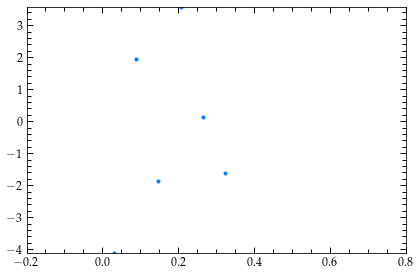

In [54]:
hdata = complot.hist(asymmetry_plot_plus[:,0], 6, weights=asymmetry_plot[:,1], range=(tLL, tUL))
plt.errorbar(hdata.bins, hdata.counts, fmt='.')
plt.xlim(-0.2, 0.8)

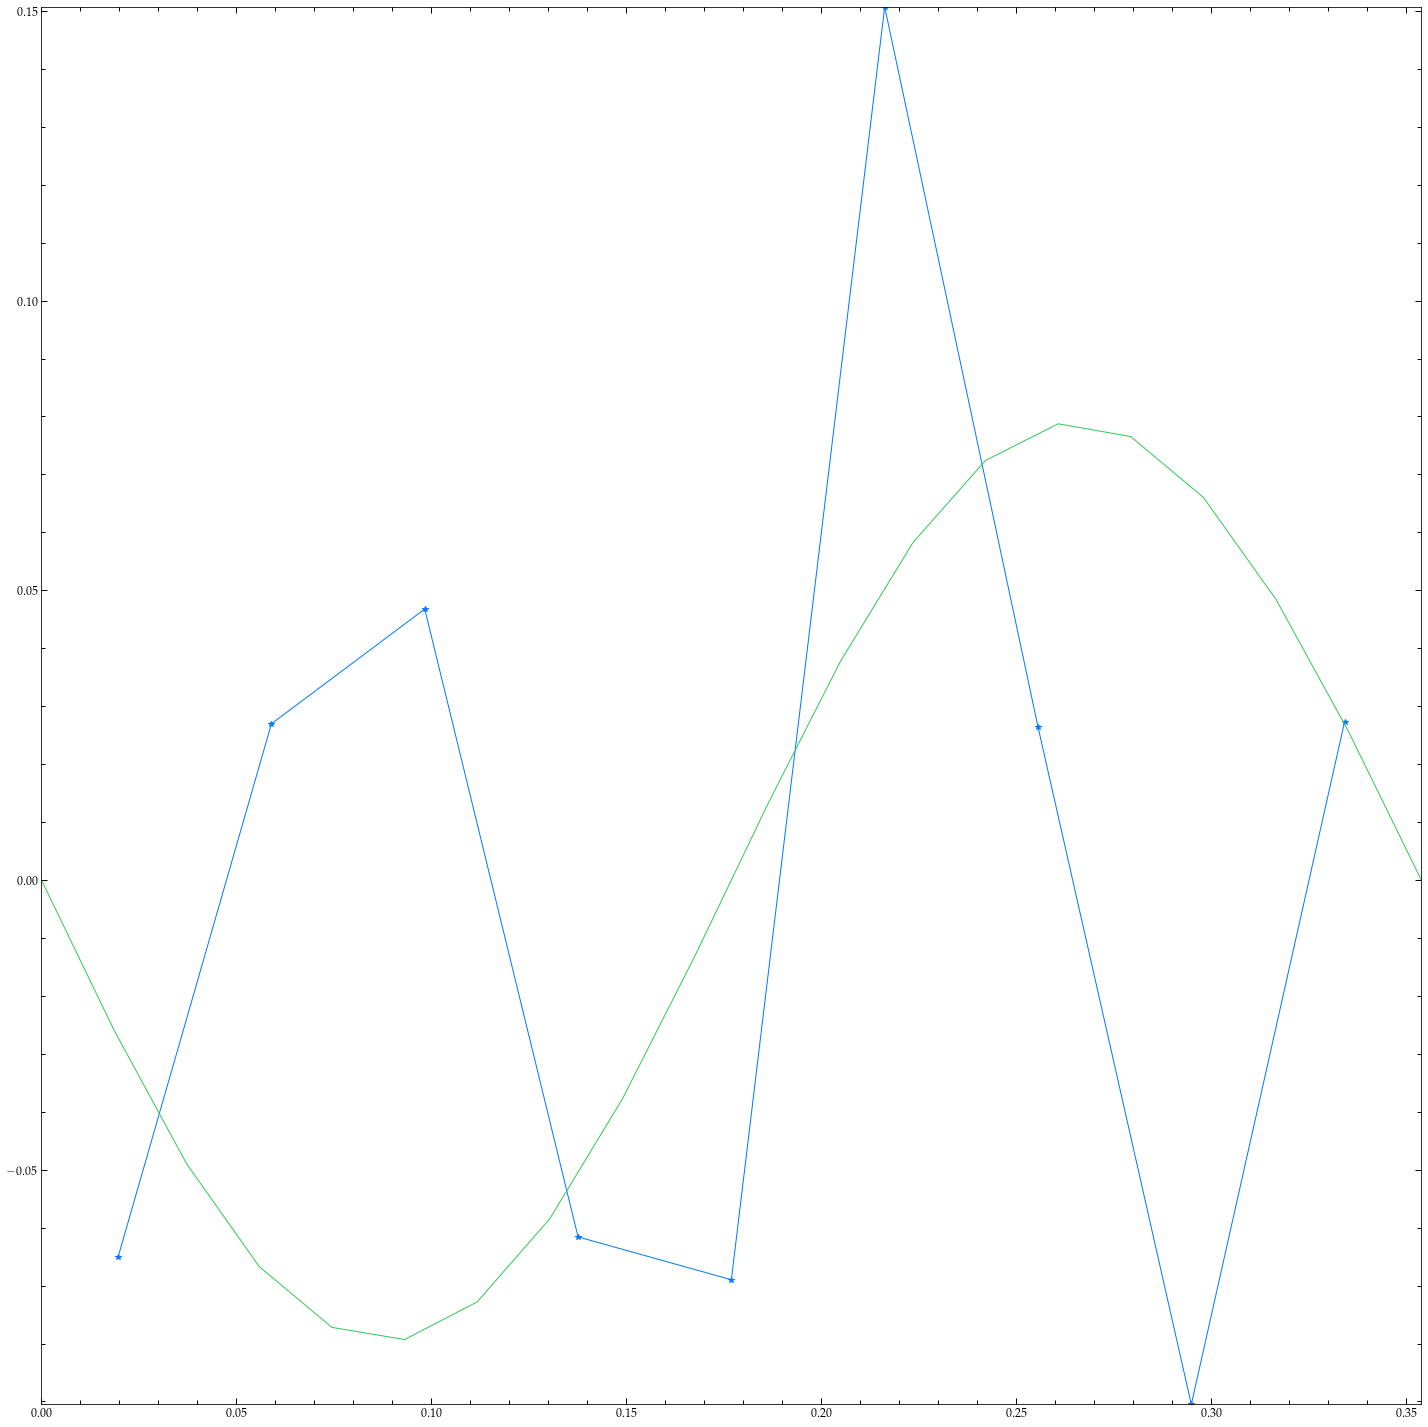

In [116]:
plt.rcParams["figure.figsize"] = (20,20)
_plus = plt.hist(asymmetry_plot_plus[:,0], 9, weights=asymmetry_plot_plus[:,1], range=(tLL, tUL));
_plus, edges = _plus[0], _plus[1]
_minus = plt.hist(asymmetry_plot_minus[:,0], 9, weights=asymmetry_plot_minus[:,1], range=(tLL, tUL))[0];
asym = (_plus - _minus)/(_plus+_minus)
centers = 0.5 * (edges[:-1] + edges[1:])
_norm = np.trapz(asym, centers)
_t = np.linspace(0, tUL, 20)
_eta = -1
_phis = -0.08
_dg = 0.088
_y = -_eta * np.sin(_phis) * np.sin(17.757*_t) / (np.cosh(0.5*_dg*_t) - _eta * np.cos(_phis) * np.sinh(0.5*_dg*_t))
plt.close()
plt.plot(centers, asym, "*-")
plt.plot(_t, _y)

In [65]:
tLL

0.0